In [1]:
import pandas as pd
import numpy as np
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset0.csv')

In [2]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
dataset['total_calls']=dataset['total_day_calls']+dataset['total_eve_calls']+dataset['total_night_calls']
dataset['total_minutes']=dataset['total_day_minutes']+dataset['total_eve_minutes']+dataset['total_night_minutes']
dataset['total_charges']=dataset['total_day_charge']+dataset['total_eve_charge']+dataset['total_night_charge']
dataset.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)

churn_column = dataset['churn']
dataset['churn'] = churn_column
dataset['churn'] = dataset['churn'].replace({'no':0,'yes':1})
###THIS SECTION IS DATASET SPECIFIC PROCESSING

In [3]:
nans = dataset.isna().sum().sort_values(ascending=False)
pct = 100 * nans / dataset.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_nans', 'percentage_of_nans']
nan_stats

,num_of_nans,percentage_of_nans
state,0,0.0
account_length,0,0.0
area_code,0,0.0
international_plan,0,0.0
voice_mail_plan,0,0.0
number_vmail_messages,0,0.0
total_intl_minutes,0,0.0
total_intl_calls,0,0.0
total_intl_charge,0,0.0
number_customer_service_calls,0,0.0


In [4]:
dataset.dropna(inplace=True)

In [5]:
from category_encoders import BinaryEncoder

categorical_columns=['state','area_code','international_plan','voice_mail_plan']

encoder = BinaryEncoder(cols=['state','area_code','international_plan','voice_mail_plan'])
dataset=encoder.fit_transform(dataset)

In [6]:
from sklearn.preprocessing import StandardScaler
standardized_column=['account_length','number_vmail_messages','total_intl_minutes','total_intl_calls',
                     'total_intl_charge','number_customer_service_calls','total_calls','total_minutes','total_charges']

scaler = StandardScaler()
dataset[standardized_column] = scaler.fit_transform(dataset[standardized_column])

In [7]:
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

In [8]:
X=dataset.drop('churn',axis=1)
y=dataset['churn']

<Axes: >

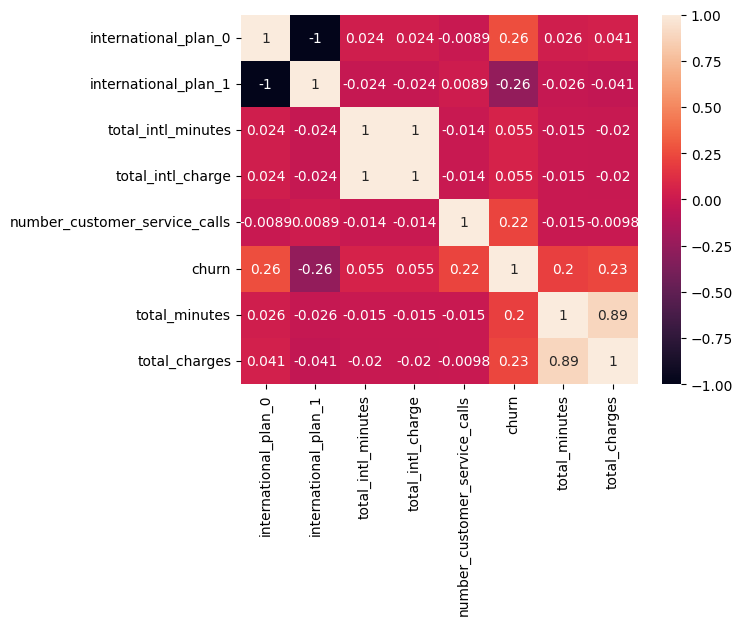

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(dataset.corr(),annot=True)



<BarContainer object of 2 artists>

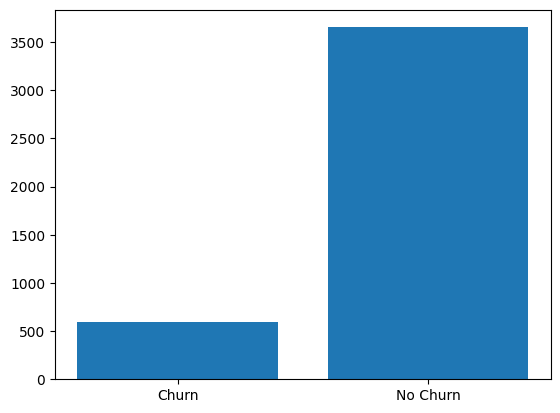

In [10]:
plt.bar(['Churn','No Churn'],[y[y==1].shape[0],y[y==0].shape[0]])

In [11]:
from imblearn.over_sampling import RandomOverSampler as SMOTE
smote = SMOTE(sampling_strategy='minority')
y=y.astype(float)
X, y = smote.fit_resample(X, y)


<BarContainer object of 2 artists>

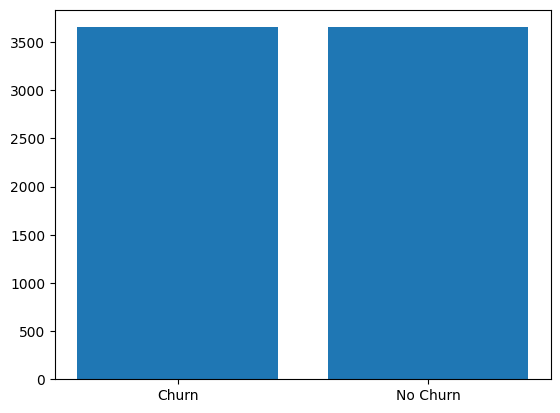

In [12]:
import matplotlib.pyplot as plt

plt.bar(['Churn','No Churn'],[y[y==1].shape[0],y[y==0].shape[0]])

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
feature_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [14]:
feature_importance

,importance
total_charges,0.258268
number_customer_service_calls,0.162715
total_minutes,0.126605
international_plan_0,0.055324
international_plan_1,0.054672
total_intl_minutes,0.053850
total_intl_charge,0.050995
total_intl_calls,0.049339
total_calls,0.042904
account_length,0.041940


In [15]:
columns_to_drop=list(feature_importance[feature_importance['importance']<0.05].index)
dataset=dataset.drop(columns_to_drop,axis=1)

In [16]:
from sklearn.decomposition import PCA 
X=dataset.drop('churn',axis=1)
y=dataset['churn']
y=y.astype(float)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# pca=PCA(n_components=2)
# pca.fit(X_train)
# X_train=pca.transform(X_train)
# X_test=pca.transform(X_test)



In [17]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-10 22:08:54,158] A new study created in memory with name: no-name-99e688c0-4913-4c46-97b0-cea9dc5bd83a
[I 2024-06-10 22:08:55,206] Trial 0 finished with value: 0.9391176470588235 and parameters: {'n_estimators': 121, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9391176470588235.
[I 2024-06-10 22:08:56,524] Trial 1 finished with value: 0.9399999999999998 and parameters: {'n_estimators': 117, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.9399999999999998.
[I 2024-06-10 22:08:56,524] A new study created in memory with name: no-name-f3bd0afd-4ab2-4e01-9e0a-d4f1816c41da
[I 2024-06-10 22:08:57,922] Trial 0 finished with value: 0.8835294117647059 and parameters: {'num_layers': 1, 'layer1_size': 63, 'layer2_size': 61, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.06771217113544604}. Best is trial 0 with value: 0.8835294117647059.
[I 2024-06-10 22:09:00,444] Trial 1 finished with 

In [18]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       721
         1.0       0.87      0.74      0.80       129

    accuracy                           0.94       850
   macro avg       0.91      0.86      0.89       850
weighted avg       0.94      0.94      0.94       850

Neural Network
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       721
         1.0       0.78      0.49      0.60       129

    accuracy                           0.90       850
   macro avg       0.85      0.73      0.77       850
weighted avg       0.89      0.90      0.89       850



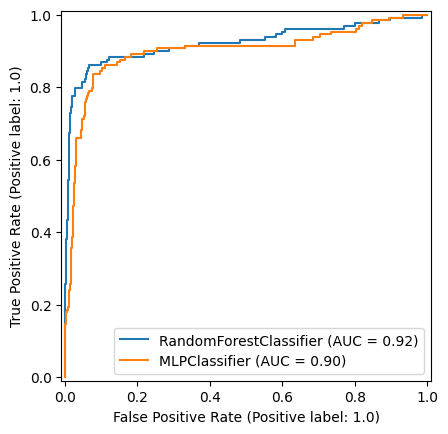

In [19]:
model_select.roc_curve()

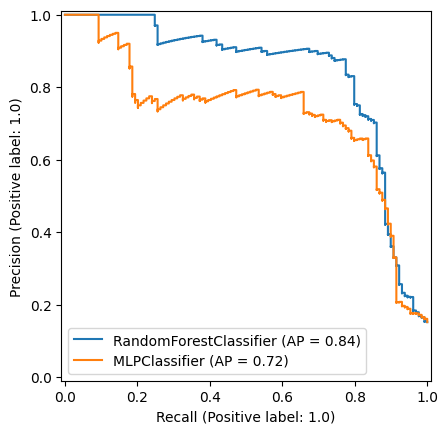

In [20]:
model_select.precision_recall_curve()